# 8.8 循环神经网络

## RNN实现股价预测

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week9/zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [3]:
# 归一化处理哦
price_norm = price/max(price)
price_norm

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64

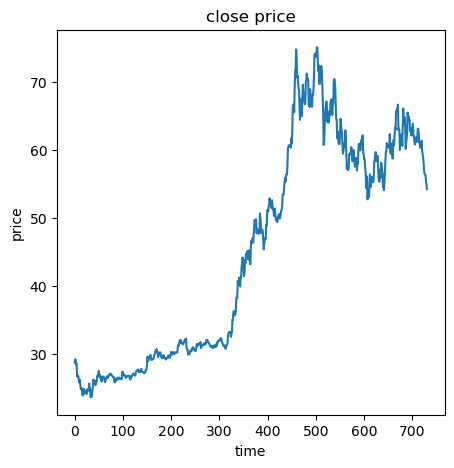

In [4]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [17]:
#define X and y
#define method to extract X and y
def extract_data(data,time_step):
    X = []
    y = []
    #0,1,2,3...9:10个样本；time_step=8;0,1...7;1,2...8;2,3...9三组（两组样本）
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    #print(X.shape)
    X = X.reshape(X.shape[0],X.shape[1],1)
    #print(X.shape)
    return X, y

In [18]:
time_step = 8

In [19]:
X,y = extract_data(price_norm,time_step)

In [20]:
X.shape,y

((723, 8, 1),
 [0.3558396590757757,
  0.3453189505926222,
  0.3435876947662805,
  0.34944732987082167,
  0.33639632441070716,
  0.33133573045678516,
  0.3322679451325076,
  0.33280063923292047,
  0.3190837661472899,
  0.31895059262218667,
  0.32001598082301236,
  0.3317352510320948,
  0.3230789719003862,
  0.3289386070049274,
  0.3245438806765215,
  0.325476095352244,
  0.3248102277267279,
  0.3217472366493541,
  0.33093620988147554,
  0.32987082168064985,
  0.32813956585430815,
  0.3282727393794113,
  0.34225595951524834,
  0.33599680383539754,
  0.3347982421094686,
  0.31548808096950326,
  0.31735251032094813,
  0.3161539485950193,
  0.3194832867225995,
  0.3317352510320948,
  0.334398721534159,
  0.3499800239712345,
  0.34332134771607403,
  0.34665068584365427,
  0.34771607404447996,
  0.3391929684378745,
  0.3431881741909708,
  0.34412038886669327,
  0.3474497269942735,
  0.3577040884272206,
  0.3559728326008789,
  0.35757091490211745,
  0.36702623518444527,
  0.357304567851911,
  

In [21]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [25]:
# train the model
y = np.array(y)
model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 11/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 12/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 13/200
25/25 [=================

In [26]:
y_train_predict = model.predict(X) * max(price)
y_train = y * max(price)

23/23 [==============================] - 0s 907us/step


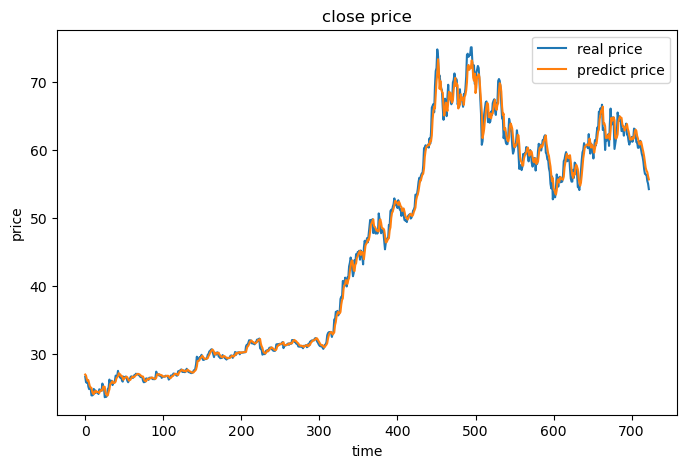

In [27]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [29]:
data_test = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week9/zgpa_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()

0    53.33
1    53.83
2    54.74
3    54.45
4    53.95
Name: close, dtype: float64

In [30]:
price_test_norm = price_test/max(price)
X_test_norm, y_test_norm = extract_data(price_test_norm,time_step)

In [31]:
#make prediction based on the test data
y_test_predict = model.predict(X_test_norm)*max(price)
y_test = [i*max(price) for i in y_test_norm]

6/6 [==============================] - 0s 1ms/step


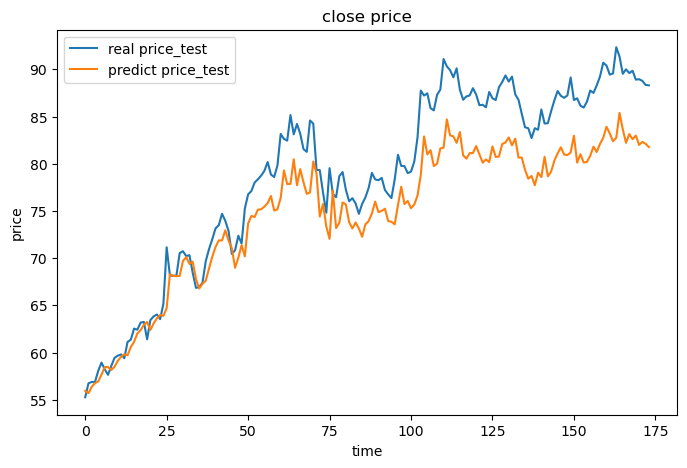

In [32]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [40]:
result_y_test = np.array(y_test).reshape(-1,1)
print(result_y_test.shape)
result_y_test_predict = np.array(y_test_predict)
print(result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result,columns=['real_price_test','predict_price_test'])
result.to_csv('zgpa_predict_test.csv')

(174, 1)
(174, 1)
(174, 2)


## LSTM文字生成

In [41]:
data = open('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week9/flare').read()
data = data.replace('\n','').replace('\r','')
data

'flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained his phd in Australia. Australia is a country in the Southern Hemisphere.flare is a teacher in ai industry. He obtained 

In [44]:
# 字符去重
letters = list(set(data))
print(letters)

['n', 'o', 'b', 'c', 'm', 'p', 'A', '.', ' ', 'd', 'r', 'a', 't', 'e', 'y', 'u', 'S', 'l', 'H', 'i', 's', 'f', 'h']


In [45]:
num_letters = len(letters)
num_letters

23

In [47]:
# 建立字典
int_to_char = {a:b for a,b in enumerate(letters)}
print(int_to_char)

char_to_int = {b:a for a,b in enumerate(letters)}
print(char_to_int)

{0: 'n', 1: 'o', 2: 'b', 3: 'c', 4: 'm', 5: 'p', 6: 'A', 7: '.', 8: ' ', 9: 'd', 10: 'r', 11: 'a', 12: 't', 13: 'e', 14: 'y', 15: 'u', 16: 'S', 17: 'l', 18: 'H', 19: 'i', 20: 's', 21: 'f', 22: 'h'}
{'n': 0, 'o': 1, 'b': 2, 'c': 3, 'm': 4, 'p': 5, 'A': 6, '.': 7, ' ': 8, 'd': 9, 'r': 10, 'a': 11, 't': 12, 'e': 13, 'y': 14, 'u': 15, 'S': 16, 'l': 17, 'H': 18, 'i': 19, 's': 20, 'f': 21, 'h': 22}


In [48]:
# time_step
time_step = 20

In [50]:
import numpy as np
from keras.utils import to_categorical
#滑动窗口提取数据
def extract_data(data, slide):
    x = []
    y = []
    for i in range(len(data) - slide):
        x.append([a for a in data[i:i+slide]])
        y.append(data[i+slide])
    return x,y
#字符到数字的批量转化
def char_to_int_Data(x,y, char_to_int):
    x_to_int = []
    y_to_int = []
    for i in range(len(x)):
        x_to_int.append([char_to_int[char] for char in x[i]])
        y_to_int.append([char_to_int[char] for char in y[i]])
    return x_to_int, y_to_int
#实现输入字符文章的批量处理，输入整个字符、滑动窗口大小、转化字典
def data_preprocessing(data, slide, num_letters, char_to_int):
    char_Data = extract_data(data, slide)
    int_Data = char_to_int_Data(char_Data[0], char_Data[1], char_to_int)
    Input = int_Data[0]
    Output = list(np.array(int_Data[1]).flatten())
    Input_RESHAPED = np.array(Input).reshape(len(Input), slide)
    new = np.random.randint(0,10,size=[Input_RESHAPED.shape[0],Input_RESHAPED.shape[1],num_letters])
    for i in range(Input_RESHAPED.shape[0]):
        for j in range(Input_RESHAPED.shape[1]):
            new[i,j,:] = to_categorical(Input_RESHAPED[i,j],num_classes=num_letters)
    return new, Output

In [51]:
# extract X,y from text data
X,y = data_preprocessing(data,time_step,num_letters,char_to_int)

In [56]:
print(X.shape)
print(len(y))

(56148, 20, 23)
56148


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,X.shape)

(39303, 20, 23) (16845, 20, 23) (56148, 20, 23)


In [59]:
y_train_category = to_categorical(y_train,num_letters)
print(y_train_category)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(units=20,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu'))
model.add(Dense(units=num_letters,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                3520      
                                                                 
 dense_1 (Dense)             (None, 23)                483       
                                                                 
Total params: 4,003
Trainable params: 4,003
Non-trainable params: 0
_________________________________________________________________


In [91]:
#train the model
model.fit(X_train,y_train_category,batch_size=1000,epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 20ms/step - loss: 1.2987 - accuracy: 0.6249
Epoch 2/10
40/40 [==============================] - 1s 20ms/step - loss: 0.9138 - accuracy: 0.7547
Epoch 3/10
40/40 [==============================] - 1s 21ms/step - loss: 0.6672 - accuracy: 0.8295
Epoch 4/10
40/40 [==============================] - 1s 24ms/step - loss: 0.4252 - accuracy: 0.8806
Epoch 5/10
40/40 [==============================] - 1s 20ms/step - loss: 0.8188 - accuracy: 0.7699
Epoch 6/10
40/40 [==============================] - 1s 19ms/step - loss: 0.5062 - accuracy: 0.8773
Epoch 7/10
40/40 [==============================] - 1s 20ms/step - loss: 0.2230 - accuracy: 0.9571
Epoch 8/10
40/40 [==============================] - 1s 20ms/step - loss: 0.1417 - accuracy: 0.9862
Epoch 9/10
40/40 [==============================] - 1s 20ms/step - loss: 0.0941 - accuracy: 1.0000
Epoch 10/10
40/40 [==============================] - 1s 22ms/step - loss: 0.0650 - accuracy: 1.0000


In [92]:
#make prediction based on the training data
y_train_predict = model.predict(X_train)
print(y_train_predict)

1229/1229 [==============================] - 2s 2ms/step
[[9.7867703e-01 2.8764242e-03 7.8121184e-07 ... 6.0104224e-04
  2.3963734e-05 1.0945584e-03]
 [5.0193557e-06 3.3920087e-12 6.0364114e-12 ... 7.9455851e-05
  8.3590329e-08 4.4554203e-05]
 [2.7652253e-05 1.3077644e-14 3.0819967e-09 ... 3.6820984e-07
  6.5971690e-12 2.3865573e-07]
 ...
 [8.0387450e-17 5.2057658e-26 3.1487801e-21 ... 1.3631832e-21
  3.0846176e-20 3.3191701e-03]
 [1.5150908e-06 1.0705980e-05 2.3043164e-04 ... 1.5233245e-06
  5.7349721e-09 7.9370584e-05]
 [1.0929341e-24 6.8719633e-26 2.4605090e-13 ... 4.8460649e-29
  1.4673712e-14 1.9743986e-06]]


In [93]:
print(type(y_train_predict))
print(y_train_predict.shape)

<class 'numpy.ndarray'>
(39303, 23)


In [94]:
result = np.argmax(y_train_predict,axis=1)

In [95]:
y_train_predict = result

In [96]:
#transform the int to letters
y_train_predict_char = [int_to_char[i] for i in y_train_predict]
print(y_train_predict_char)

['n', 'i', 'e', 's', 'e', 'a', 'l', 'h', 'i', 'u', 'n', 'A', 'a', 'a', 'H', 'l', ' ', ' ', 'e', 'e', 'h', 'o', 's', 'e', 'A', ' ', 'u', 'e', 'i', 'e', 'i', ' ', 'e', 'A', ' ', ' ', 'h', 'd', 'r', 'r', 'i', 'r', 'h', ' ', 'f', 'l', 'e', 'l', 'e', 'a', 'a', ' ', 'n', 'e', '.', 'i', 't', 'i', '.', 'e', 'h', 'a', 'A', 'a', '.', 'e', 'i', 'a', 'e', 'S', 'a', 'r', 'r', ' ', 'e', ' ', 'a', ' ', 'r', 't', 'h', ' ', 'y', 'A', 'r', 'd', 'm', 'a', 'r', 'a', 'u', '.', '.', 'a', ' ', 'e', 't', 'i', 'r', 'e', 't', 'e', 't', 'r', 'h', 'r', 'r', 'a', 'h', 'n', 'A', 'h', 't', 'n', ' ', 'r', 'e', 'p', 'b', 'i', 'a', ' ', 'i', ' ', 'p', 's', 'e', 'l', 'l', 'd', ' ', 't', 'n', 'i', 'l', 'l', 'i', 'n', 'r', ' ', 'i', ' ', 'a', 'l', 'n', 'm', 'i', 'd', 'i', 'o', 'l', ' ', 'n', 'r', 't', ' ', 'r', 'i', 'u', '.', 'm', 'e', ' ', 'c', 'r', 'n', 'o', ' ', 'o', 'e', 'h', ' ', 'f', 'i', 'l', 'i', 'm', ' ', ' ', 'p', 'n', ' ', 'a', 'm', 'e', 'o', ' ', 'e', ' ', 'e', '.', 't', 'n', 'o', 'a', 's', 'n', ' ', 'u', 'u',

In [97]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1.0


In [98]:
y_test_predict = model.predict(X_test)
y_test_predict = np.argmax(y_test_predict,axis=1)
accuracy_test = accuracy_score(y_test,y_test_predict)

print(accuracy_test)
print(y_test_predict)
print(y_test)

527/527 [==============================] - 1s 2ms/step
1.0
[ 8 22  8 ...  8  0  8]
[8, 22, 8, 1, 15, 8, 8, 17, 20, 13, 18, 10, 6, 14, 11, 0, 13, 12, 19, 22, 8, 11, 15, 22, 19, 8, 13, 5, 0, 15, 20, 19, 6, 2, 22, 11, 3, 8, 15, 7, 21, 20, 14, 15, 18, 1, 10, 0, 6, 19, 1, 8, 8, 10, 12, 21, 8, 19, 11, 20, 12, 7, 15, 9, 19, 8, 19, 11, 19, 8, 19, 7, 18, 8, 8, 11, 1, 19, 15, 13, 13, 22, 17, 8, 19, 13, 19, 12, 13, 0, 11, 6, 10, 22, 11, 22, 10, 0, 12, 20, 8, 19, 8, 20, 13, 0, 10, 8, 7, 8, 21, 17, 8, 22, 8, 12, 19, 3, 22, 12, 8, 8, 13, 22, 20, 20, 10, 18, 11, 16, 0, 12, 10, 20, 19, 0, 9, 13, 20, 13, 19, 11, 13, 7, 15, 11, 8, 3, 20, 0, 10, 19, 12, 16, 19, 7, 1, 20, 19, 0, 22, 22, 8, 8, 15, 11, 19, 0, 9, 13, 19, 12, 20, 13, 1, 11, 20, 2, 22, 8, 13, 8, 19, 11, 20, 19, 8, 13, 19, 8, 8, 14, 13, 8, 11, 16, 17, 22, 11, 8, 11, 22, 19, 19, 8, 7, 8, 0, 19, 4, 0, 11, 8, 7, 9, 16, 13, 10, 11, 10, 10, 13, 15, 20, 8, 9, 12, 15, 19, 5, 13, 19, 22, 18, 19, 19, 6, 12, 10, 8, 11, 15, 20, 13, 0, 0, 11, 13, 8, 13, 19

In [99]:
new_letters = 'flare is a teacher in ai industry. He obtained his phd in Australia.'
X_new, y_new = data_preprocessing(new_letters,time_step,num_letters,char_to_int)
y_new_predict = model.predict(X_new)
y_new_predict = np.argmax(y_new_predict,axis=1)
print(y_new_predict)

2/2 [==============================] - 0s 2ms/step
[ 0  8 11 19  8 19  0  9 15 20 12 10 14  7  8 18 13  8  1  2 12 11 19  0
 13  9  8 22 19 20  8  5 22  9  8 19  0  8  6 15 20 12 10 11 17 19 11  7]


In [100]:
#transform the int to letters
y_new_predict_char = [int_to_char[i] for i in y_new_predict]
print(y_new_predict_char)

['n', ' ', 'a', 'i', ' ', 'i', 'n', 'd', 'u', 's', 't', 'r', 'y', '.', ' ', 'H', 'e', ' ', 'o', 'b', 't', 'a', 'i', 'n', 'e', 'd', ' ', 'h', 'i', 's', ' ', 'p', 'h', 'd', ' ', 'i', 'n', ' ', 'A', 'u', 's', 't', 'r', 'a', 'l', 'i', 'a', '.']


In [101]:
for i in range(0,X_new.shape[0]-20):
    print(new_letters[i:i+20],'--predict next letter is---',y_new_predict_char[i])

flare is a teacher i --predict next letter is--- n
lare is a teacher in --predict next letter is---  
are is a teacher in  --predict next letter is--- a
re is a teacher in a --predict next letter is--- i
e is a teacher in ai --predict next letter is---  
 is a teacher in ai  --predict next letter is--- i
is a teacher in ai i --predict next letter is--- n
s a teacher in ai in --predict next letter is--- d
 a teacher in ai ind --predict next letter is--- u
a teacher in ai indu --predict next letter is--- s
 teacher in ai indus --predict next letter is--- t
teacher in ai indust --predict next letter is--- r
eacher in ai industr --predict next letter is--- y
acher in ai industry --predict next letter is--- .
cher in ai industry. --predict next letter is---  
her in ai industry.  --predict next letter is--- H
er in ai industry. H --predict next letter is--- e
r in ai industry. He --predict next letter is---  
 in ai industry. He  --predict next letter is--- o
in ai industry. He o --predict 